# Zero-Shot Experiments

### GPT-4o-mini & 'Study Type' Classification

Note: Study Type classification was assumed to be multilabel classification

In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

In [2]:
from evaluation.evaluate import get_performance_report
import pandas as pd

file = './study_type_gpt-4o-mini_05-06-05.csv'
df = pd.read_csv(file)

print(get_performance_report('labels', 'pred_labels', df))


Computing F1 score and confidence interval...
Running bootstrap for custom_f1...
Computing accuracy and confidence interval...
Running bootstrap for custom_accuracy...
Computing precision and confidence interval...
Running bootstrap for custom_precision...
Computing recall and confidence interval...
Running bootstrap for custom_recall...
{'metrics': {'f1-weighted': (0.4175119681345698, (np.float64(0.3023989908606005), np.float64(0.5300500549359729))), 'accuracy': (0.3917525773195876, (np.float64(0.29896907216494845), np.float64(0.4948453608247423))), 'precision': (0.7739230737886049, (np.float64(0.3568085833354692), np.float64(0.8079404246026887))), 'recall': (0.5051546391752577, (np.float64(0.4020618556701031), np.float64(0.6082474226804123)))}, 'nr_empty_tru': np.int64(0)}


### Parse prediction output


#### LLama Parsing

In [ ]:
import pandas as pd
import json
from zero_shot.predict_zero_shot import get_label2int
from evaluation.evaluate import get_performance_report


task = 'Study Type'
label2int = get_label2int(task)

def parse_prediction_llama_output(prediction_text) -> list[int]:
    # Split at [/INST]
    parts = prediction_text.split('[/INST]')
    prediction = parts[-1].strip()

    # Case 1: There is a prediction in dictionary format
    if '{' in prediction:
        start = prediction.index('{')
        end = prediction.index('}')
        prediction_dict = prediction[start:end+1]
        prediction_dict = json.loads(prediction_dict)
    
        # Convert dict into one-hot encoding
        onehot_list = [0] * len(label2int)
        for label, value in prediction_dict.items():
            # raise error if label is not in label2int
            if label not in label2int:
                raise ValueError(f'Label {label} not found in label2int mapping.')
            pos = label2int[label]
            onehot_list[pos] = int(value)
        return onehot_list
    else:
        print(f'No prediction found in text: {prediction_text}')

file = 'study_type_Llama-2-13-chat-hf_22-07-22.csv'

df = pd.read_csv(file)
# create pred_labels column if not exists
if 'pred_labels' not in df.columns:
    df['pred_labels'] = None

for i, row in df.iterrows():
    # write parsed prediction into pred_labels column
    df.at[i, 'pred_labels'] = str(parse_prediction_llama_output(row['prediction_text']))

# Save the updated DataFrame to a new CSV file
output_file = 'parsed_' + file
df.to_csv(output_file, index=False)

get_performance_report('labels', 'pred_labels', df)
    


Computing F1 score and confidence interval...
Running bootstrap for custom_f1...
Computing accuracy and confidence interval...
Running bootstrap for custom_accuracy...
Computing precision and confidence interval...
Running bootstrap for custom_precision...
Computing recall and confidence interval...
Running bootstrap for custom_recall...


{'metrics': {'f1-weighted': (0.5284449799913717,
   (np.float64(0.4197783481596423), np.float64(0.6370921762153202))),
  'accuracy': (0.5567010309278351,
   (np.float64(0.4536082474226804), np.float64(0.6494845360824743))),
  'precision': (0.6555870246591896,
   (np.float64(0.5083301522099698), np.float64(0.7856330075738375))),
  'recall': (0.5773195876288659,
   (np.float64(0.4742268041237113), np.float64(0.6701030927835051)))},
 'nr_empty_tru': np.int64(0)}

#### GPT parsing

In [55]:
from zero_shot.predict_zero_shot import parse_class_predictions

file = 'study_type_gpt-4o-mini_22-07-22.csv'

parse_class_predictions(file, task='Study Type')

df = pd.read_csv(file)
get_performance_report('labels', 'pred_labels', df)

Computing F1 score and confidence interval...
Running bootstrap for custom_f1...
Computing accuracy and confidence interval...
Running bootstrap for custom_accuracy...
Computing precision and confidence interval...
Running bootstrap for custom_precision...
Computing recall and confidence interval...
Running bootstrap for custom_recall...


{'metrics': {'f1-weighted': (0.4562604728622199,
   (np.float64(0.33709854789824306), np.float64(0.5661976805689666))),
  'accuracy': (0.44329896907216493,
   (np.float64(0.35051546391752575), np.float64(0.5463917525773195))),
  'precision': (0.7863393639242638,
   (np.float64(0.5800899463834838), np.float64(0.8237174261391482))),
  'recall': (0.5154639175257731,
   (np.float64(0.41237113402061853), np.float64(0.6185567010309279)))},
 'nr_empty_tru': np.int64(0)}

In [56]:
file = 'study_type_gpt-4o-2024-08-06_22-07-22.csv'
parse_class_predictions(file, task='Study Type')

df = pd.read_csv(file)
get_performance_report('labels', 'pred_labels', df)

Computing F1 score and confidence interval...
Running bootstrap for custom_f1...
Computing accuracy and confidence interval...
Running bootstrap for custom_accuracy...
Computing precision and confidence interval...
Running bootstrap for custom_precision...
Computing recall and confidence interval...
Running bootstrap for custom_recall...


{'metrics': {'f1-weighted': (0.6216621967076789,
   (np.float64(0.5104601842619205), np.float64(0.7243185550540193))),
  'accuracy': (0.6391752577319587,
   (np.float64(0.5463917525773195), np.float64(0.7319587628865979))),
  'precision': (0.7892291665790384,
   (np.float64(0.6021856629523412), np.float64(0.8355817290355593))),
  'recall': (0.6391752577319587,
   (np.float64(0.5463917525773195), np.float64(0.7319587628865979)))},
 'nr_empty_tru': np.int64(0)}

In [77]:
file = '/home/vera/Documents/Uni/Master/Master_Thesis2.0/PsyNamic-Scale/bert_baseline/predictions/clinicalbert_study_type_20250221_test_predictions.csv'
df = pd.read_csv(file)
get_performance_report('label', 'prediction', df)

Computing F1 score and confidence interval...
Running bootstrap for custom_f1...
Computing accuracy and confidence interval...
Running bootstrap for custom_accuracy...
Computing precision and confidence interval...
Running bootstrap for custom_precision...
Computing recall and confidence interval...
Running bootstrap for custom_recall...


{'metrics': {'f1-weighted': (0.8707412862052037,
   (np.float64(0.7905528292710534), np.float64(0.9268839166356126))),
  'accuracy': (0.865979381443299,
   (np.float64(0.7835051546391752), np.float64(0.9175257731958762))),
  'precision': (0.8789345720766607,
   (np.float64(0.7900749563969184), np.float64(0.9316097340295442))),
  'recall': (0.865979381443299,
   (np.float64(0.7835051546391752), np.float64(0.9175257731958762)))},
 'nr_empty_tru': np.int64(0)}

#### ME-Llama Parsing

In [57]:
def parse_prediction_mellama_output(prediction_text) -> list[int]:
    # Split at 'OUTPUT:'
    parts = prediction_text.split('OUTPUT:')
    # check there is only 2 parts
    if len(parts) != 2:
        raise ValueError(f'Prediction text does not contain "OUTPUT:": {prediction_text}')
    prediction = parts[-1].strip()

    # Case 1: There is a prediction in dictionary format
    if '{' in prediction:
        start = prediction.index('{')
        end = prediction.index('}')
        prediction_dict = prediction[start:end+1]
        prediction_dict = json.loads(prediction_dict)
    
        # Convert dict into one-hot encoding
        onehot_list = [0] * len(label2int)
        for label, value in prediction_dict.items():
            # raise error if label is not in label2int
            if label not in label2int:
                raise ValueError(f'Label {label} not found in label2int mapping.')
            pos = label2int[label]
            onehot_list[pos] = int(value)
        return onehot_list
    # Case 2: There is a prediction in string format, e.g. 'Randomized-controlled trial (RCT)'
    elif prediction in label2int.keys():
        # Case 2: There is a prediction in string format
        onehot_list = [0] * len(label2int)
        pos = label2int[prediction]
        onehot_list[pos] = 1
        return onehot_list
    # Case 3: There is a prediction in string format  e.g. 'Randomized-controlled trial (RCT): 1'
    elif ':' in prediction:
        # Case 3: There is a prediction in string format with a score
        onehot_list = [0] * len(label2int)
        label = prediction.split(':')[0].strip()
        pos = label2int[label]
        onehot_list[pos] = 1
        return onehot_list
    else:
        print(f'{prediction}')
        

file = 'study_type_MeLLaMA-13B-chat_22-07-22.csv'

df = pd.read_csv(file)
# create pred_labels column if not exists
if 'pred_labels' not in df.columns:
    df['pred_labels'] = None

for i, row in df.iterrows():
    # write parsed prediction into pred_labels column
    parsed = parse_prediction_mellama_output(row['prediction_text'])
    if isinstance(parsed, list):
        df.at[i, 'pred_labels'] = str(parsed)
    elif parsed is None:
        df.at[i, 'pred_labels'] = None

# Save the updated DataFrame to a new CSV file
output_file = 'parsed_' + file
df.to_csv(output_file, index=False)

get_performance_report('labels', 'pred_labels', df)

1
1
0
1
1
1
0
1
0
0
1
0
1
1
Computing F1 score and confidence interval...
Running bootstrap for custom_f1...
Computing accuracy and confidence interval...
Running bootstrap for custom_accuracy...
Computing precision and confidence interval...
Running bootstrap for custom_precision...
Computing recall and confidence interval...
Running bootstrap for custom_recall...


{'metrics': {'f1-weighted': (0.6906913367756741,
   (np.float64(0.5807281105021325), np.float64(0.7822267487307543))),
  'accuracy': (0.6746987951807228,
   (np.float64(0.5662650602409639), np.float64(0.7710843373493976))),
  'precision': (0.6937424115064911,
   (np.float64(0.5675812591974698), np.float64(0.7788297486043542))),
  'recall': (0.7108433734939759,
   (np.float64(0.6024096385542169), np.float64(0.7951807228915663)))},
 'nr_empty_tru': np.int64(14)}

#### Make performance Plot

/tmp/ipykernel_8554/3017308767.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_8554/3017308767.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_sub["model"], rotation=15, ha="right")
/tmp/ipykernel_8554/3017308767.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_8554/3017308767.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_sub["model"], rotation=15, ha="right")
/tmp/ipykernel_8554/3017308767.py:100: FutureWarning: 

Passing `p

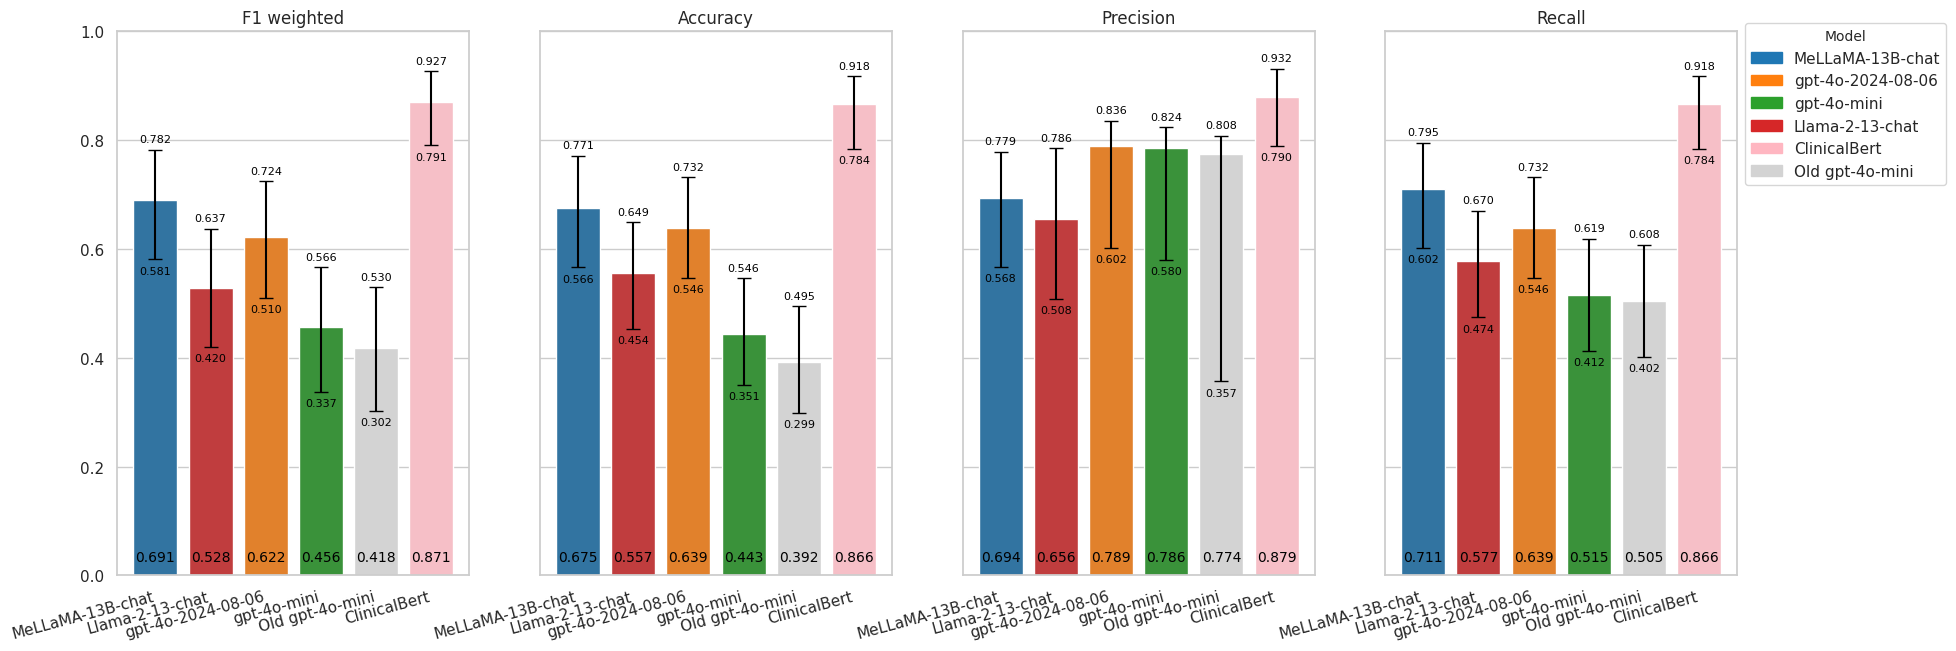

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'MeLLaMA-13B-chat': {
        'metrics': 
        {
            'f1-weighted': (0.6906913367756741, 0.5807281105021325, 0.7822267487307543),
             'accuracy': (0.6746987951807228,0.5662650602409639, 0.7710843373493976),
             'precision': (0.6937424115064911,0.5675812591974698, 0.7788297486043542),
             'recall': (0.7108433734939759,0.6024096385542169, 0.7951807228915663)
        },
        'nr_empty_tru': 14,
        },
    'Llama-2-13-chat':{
        'metrics': 
        {
            'f1-weighted': (0.5284449799913717, 0.4197783481596423, 0.6370921762153202),
            'accuracy': (0.5567010309278351, 0.4536082474226804, 0.6494845360824743),
            'precision': (0.6555870246591896, 0.5083301522099698, 0.7856330075738375),
            'recall': (0.5773195876288659,0.4742268041237113, 0.6701030927835051),
        },
        'nr_empty_tru': 0
        },
    'gpt-4o-2024-08-06': {
        'metrics': 
        {
            'f1-weighted': (0.6216621967076789, 0.5104601842619205, 0.7243185550540193),
            'accuracy': (0.6391752577319587,0.5463917525773195,0.7319587628865979),
            'precision': (0.7892291665790384, 0.6021856629523412,0.8355817290355593),
            'recall': (0.6391752577319587, 0.5463917525773195,0.7319587628865979)
        },
        'nr_empty_tru': 0
        },
    'gpt-4o-mini': {
       'metrics': 
       {
            'f1-weighted': (0.4562604728622199, 0.33709854789824306, 0.5661976805689666),
            'accuracy': (0.44329896907216493, 0.35051546391752575, 0.5463917525773195),
            'precision': (0.7863393639242638, 0.5800899463834838, 0.8237174261391482),
            'recall': (0.5154639175257731, 0.41237113402061853, 0.6185567010309279)
        },
 '      nr_empty_tru': 0
    },
    'Old gpt-4o-mini': {
        'metrics': {
            'f1-weighted': (0.4175119681345698, 0.3023989908606005, 0.5300500549359729), 
            'accuracy': (0.3917525773195876, 0.29896907216494845, 0.4948453608247423), 
            'precision': (0.7739230737886049, 0.3568085833354692, 0.8079404246026887), 
            'recall': (0.5051546391752577, 0.4020618556701031, 0.6082474226804123),
        },
        'nr_empty_tru': 0},
    'ClinicalBert':{
        'metrics': {
            'f1-weighted': (0.8707412862052037, 0.7905528292710534, 0.9268839166356126),
            'accuracy': (0.865979381443299, 0.7835051546391752, 0.9175257731958762),
            'precision': (0.8789345720766607, 0.7900749563969184, 0.9316097340295442),
            'recall': (0.865979381443299, 0.7835051546391752, 0.9175257731958762)},
        'nr_empty_tru': 0
    }
}

rows = []
for model, values in data.items():
    metrics = values['metrics']
    for metric, (mean, ci_low, ci_high) in metrics.items():
        rows.append({
            'model': model,
            'metric': metric,
            'mean': mean,
            'ci_lower': ci_low,
            'ci_upper': ci_high
        })

df_metrics = pd.DataFrame(rows)

MODEL_COLORS = {
    'MeLLaMA-13B-chat': '#1f77b4',
    'gpt-4o-2024-08-06': '#ff7f0e',
    'gpt-4o-mini': '#2ca02c',
    'Llama-2-13-chat': '#d62728',
    'ClinicalBert': '#FFB6C1',
    'Old gpt-4o-mini': '#d3d3d3',
}


sns.set(style="whitegrid")
metrics = df_metrics['metric'].unique()

fig, axes = plt.subplots(1, len(metrics), figsize=(6 * len(metrics), 8), sharey=True)

if len(metrics) == 1:
    axes = [axes]  # ensure iterable if only one metric

for i, metric in enumerate(metrics):
    ax = axes[i]
    df_sub = df_metrics[df_metrics['metric'] == metric].reset_index(drop=True)
    
    sns.barplot(
        x="model",
        y="mean",
        data=df_sub,
        palette=MODEL_COLORS,
        ax=ax,
        errorbar=None
    )

    # make x axis 0 to 1
    ax.set(ylim=(0,1))

    
    # Manual error bars
    for idx, row in df_sub.iterrows():
        yerr_lower = row["mean"] - row["ci_lower"]
        yerr_upper = row["ci_upper"] - row["mean"]
        ax.errorbar(idx, row["mean"],
                    yerr=[[yerr_lower], [yerr_upper]],
                    fmt='none', color='black', capsize=5)
        
        # Place mean value at the bottom of the bar
        ax.text(idx, 0.02, f"{row['mean']:.3f}", ha="center", va="bottom", color="black", fontsize=10)
        
        ax.text(idx, row["ci_lower"] - 0.03,
                f"{row['ci_lower']:.3f}", ha="center", va="bottom", color="black", fontsize=8)
        
        ax.text(idx, row["ci_upper"] + 0.01,
                f"{row['ci_upper']:.3f}", ha="center", va="bottom", color="black", fontsize=8)

    ax.set_title(metric.replace('-', ' ').capitalize())
    ax.set_ylabel(metric if i == 0 else "")
    ax.set_xlabel("")
    ax.set_xticklabels(df_sub["model"], rotation=15, ha="right")
    

# Single legend
handles = [plt.Rectangle((0,0),1,1, color=color) for model, color in MODEL_COLORS.items()]
labels = list(MODEL_COLORS.keys())
fig.legend(handles, labels, title="Model", loc="upper left", bbox_to_anchor=(0.8, 0.9), title_fontsize="small")

plt.subplots_adjust(right=0.8, bottom=0.2)
plt.show()